##   <u><center><font color="RoyalBlue">Projet économétrie - Partie étude économétrique Python </font></center></u>

####  Etude de la relation de LT et de CT entre 3 variables macroéconomiques ( inflation énergie , hors énergie , tx d'intérêt ) et l'indice boursier Euro Stoxx 50 ( VAR , VECM , Causalité de granger .. ) .Cette partie est précédée d'une partie Statistique Descriptives des données avec le langage R

#### Cette étude vise à comprendre l'impact de la macroéconomie ( sphère réelle ) sur le marché boursier ( sphère financière ) de la zone euro ainsi que la direction inverse pendant la période 2004-2019

### <u><font color="DarkBlue">Importation des librairies</font></u>

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.api import VAR

### <u><font color="DarkBlue">Préparation de la base de données</font></u>

In [79]:
# importation de la data
df=pd.read_csv('Data.csv',index_col=0,sep=';')
#Traiter les séries comme des séries temporelles
df.index=pd.to_datetime(df.index)
df.index=df.index.to_period('M')
df.head()

,IPC energy excluded,IP energy,EONIA,Euro Stoxx 50
TIME,,,,
2004-01,83.64,65.13,0.020214,2839.13
2004-02,83.87,65.09,0.020315,2893.18
2004-03,84.35,65.93,0.020057,2787.49
2004-04,84.72,66.65,0.020780,2787.48
2004-05,84.84,68.27,0.020152,2749.62


In [80]:
df.shape  # 192 observations 

(192, 4)

In [81]:
# Logger toutes les séries 
names = ['IPC energy excluded','IP energy','Euro Stoxx 50']
for i in names:
    df[i]=np.log(df[i])
df['EONIA']=np.log(df['EONIA']+1)  # EONIA peut être négatif donc on ajoute 1 

### <u><font color="DarkBlue">Etude de stationnarité</font></u>

#### Exemple pour une variable puis création  d'une fonction

In [82]:
# IPC hors énergie
# ADF 
adf_stat, pvaleur, crit, regres = adfuller(df['IPC energy excluded'], regression="ct", regresults=True,autolag='AIC')
regres.resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     119.6
Date:                Thu, 19 May 2022   Prob (F-statistic):           6.41e-81
Time:                        23:19:38   Log-Likelihood:                 909.06
No. Observations:                 176   AIC:                            -1782.
Df Residuals:                     158   BIC:                            -1725.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0354      0.015     -2.362      0.019      -0.065      -0.006
x2            -0.2716      0.077     -3.534      0.001      -0.423      -0.120
x3             0.2047      0.078      2.622      0.010       0.051       0.359
x4             0.0932      0.077      1.207      0.229      -0.059       0.246
x5            -0.0315      0.039     -0.812      0.418      -0.108       0.045
x6            -0.0479      0.038     -1.250      0.213      -0.124       0.028
x7            -0.0050      0.038     -0.132      0.895      -0.080       0.070
x8            -0.0659      0.038     -1.754      0.081      -0.140       0.008
x9            -0.0572      0.038     -1.526      0.129      -0.131       0.017
x10           -0.0409      0.038     -1.078      0.283      -0.116       0.034
x11           -0.0522      0.039     -1.355      0.177      -0.128       0.024
x12           -0.0318      0.039     -0.822      0.412      -0.108       0.045
x13            0.8968      0.039     23.171      0.000       0.820       0.973
x14            0.2735      0.080      3.407      0.001       0.115       0.432
x15           -0.2434      0.083     -2.927      0.004      -0.408      -0.079
x16           -0.1419      0.081     -1.750      0.082      -0.302       0.018
const          0.1590      0.067      2.380      0.019       0.027       0.291
x17         3.809e-05   1.77e-05      2.158      0.032    3.22e-06    7.29e-05
==============================================================================
Omnibus:                        2.466   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.046
Skew:                           0.196   Prob(JB):                        0.359
Kurtosis:                       3.354   Cond. No.                     1.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
# 2.158 < 2.79 --> tendance non significative --> passer au modèle 2 

In [84]:
adf_stat, pvaleur, crit, regres = adfuller(df['IPC energy excluded'], regression="c", regresults=True,autolag='AIC')
regres.resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     123.9
Date:                Thu, 19 May 2022   Prob (F-statistic):           5.52e-81
Time:                        23:19:41   Log-Likelihood:                 906.51
No. Observations:                 176   AIC:                            -1779.
Df Residuals:                     159   BIC:                            -1725.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0034      0.002     -1.554      0.122      -0.008       0.001
x2            -0.2744      0.078     -3.530      0.001      -0.428      -0.121
x3             0.2134      0.079      2.706      0.008       0.058       0.369
x4             0.0890      0.078      1.140      0.256      -0.065       0.243
x5            -0.0593      0.037     -1.600      0.112      -0.132       0.014
x6            -0.0724      0.037     -1.955      0.052      -0.145       0.001
x7            -0.0265      0.037     -0.718      0.474      -0.100       0.046
x8            -0.0864      0.037     -2.351      0.020      -0.159      -0.014
x9            -0.0753      0.037     -2.036      0.043      -0.148      -0.002
x10           -0.0571      0.038     -1.520      0.131      -0.131       0.017
x11           -0.0683      0.038     -1.784      0.076      -0.144       0.007
x12           -0.0465      0.039     -1.208      0.229      -0.123       0.030
x13            0.8843      0.039     22.848      0.000       0.808       0.961
x14            0.2359      0.079      2.976      0.003       0.079       0.392
x15           -0.2891      0.081     -3.554      0.000      -0.450      -0.128
x16           -0.1710      0.081     -2.114      0.036      -0.331      -0.011
const          0.0165      0.010      1.621      0.107      -0.004       0.037
==============================================================================
Omnibus:                        1.592   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.195
Skew:                           0.142   Prob(JB):                        0.550
Kurtosis:                       3.286   Cond. No.                     5.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
# 1.621 < 2.53 --> constante non sig -->passer au 1er modèle et tester la racine unitaire 

In [86]:
adf_stat, pvaleur, crit, regres = adfuller(df['IPC energy excluded'], regression="nc", regresults=True,autolag='AIC')
adf_stat,crit

(2.0043588073509016,
 {'1%': -2.5785604997417355,
  '5%': -1.9426290417287873,
  '10%': -1.6153938728810573})

In [87]:
# 2 > -1.94 : on ne rejette pas H0 : IPC hors énergie ( en log ) est non stationnaire ( elle est au moins I(1))

In [88]:
# KPSS
import warnings  
warnings.filterwarnings('ignore') # enlever le warning message de KPSS 

statistic, p_value, n_lags, critics = kpss(df['IPC energy excluded'], regression="c",nlags="auto")
statistic,critics

(1.997095617243473, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [89]:
# 1.99 > 0.463 --> on rejette H0 : Non stationnarité 

####  Vu qu'on a 4 séries à tester et éventuellement les différencies premières , on a défini une fonction qui étudie la stationnarité d'une série donnée selon la procédure séquentielle ( les tests considérés sont ADF et KPSS ) : 

In [90]:
def test_stationnarité(série): 
    ''' cette fonction affiche les résultats de test de non stationnarité pour ADF et KPSS
    '''
    # ADF 
    print('ADF results') 
    adf_stat, pvaleur, crit, regres = adfuller(série, regression="ct", regresults=True,autolag='AIC')
    if abs(regres.resols.tvalues[-1])<2.79: 
        print('M3 : on ne rejette pas H0 --> tendance non significative : on passe au 2ème modèle')
        adf_stat, pvaleur, crit, regres = adfuller(série, regression="c", regresults=True,autolag='AIC')
        if abs(regres.resols.tvalues[-1])<2.53:
            print('M2 : on ne rejette pas H0 --> cste non significative : on passe au 1er modèle')
            adf_stat, pvaleur, crit, regres = adfuller(série, regression="nc", regresults=True,autolag='AIC')
            if adf_stat < crit['5%'] : 
                print('test de racine unitaire : on rejette H0 --> série stationnaire ')
            else : 
                print('test de racine unitaire : on ne rejette pas H0 --> série non stationnaire ')
        
        
        else : 
            print('M2: on rejette H0 --> cste significative : on garde le modèle avec cste')
            if adf_stat < crit['5%'] : 
                print('test de racine unitaire : on rejette H0 --> série stationnaire ')
            else : 
                print('test de racine unitaire : on ne rejette pas H0 --> série non stationnaire ')
        
            
    else : 
        print('M3: on rejette H0 --> tendance significative : on garde le modèle avec trend')
        if adf_stat < crit['5%'] : 
            print('test de racine unitaire : on rejette H0 --> série stationnaire ')
        else : 
            print('test de racine unitaire : on ne rejette pas H0 --> série non stationnaire ')
        
    # KPSS 
    print('Kpss results')
    warnings.filterwarnings('ignore')   # enlever le warning message de KPSS
    statistic, p_value, n_lags, critics = kpss(série, regression="c",nlags="auto")
    if statistic>critics['5%']:
        print('on rejette H0 : série non stationnaire')
    else :
        print('on ne rejette pas H0 : série stationnaire')

In [91]:
test_stationnarité(df['EONIA'])

ADF results
M3 : on ne rejette pas H0 --> tendance non significative : on passe au 2ème modèle
M2 : on ne rejette pas H0 --> cste non significative : on passe au 1er modèle
test de racine unitaire : on ne rejette pas H0 --> série non stationnaire 
Kpss results
on rejette H0 : série non stationnaire


In [92]:
test_stationnarité(df['IP energy'])

ADF results
M3 : on ne rejette pas H0 --> tendance non significative : on passe au 2ème modèle
M2 : on ne rejette pas H0 --> cste non significative : on passe au 1er modèle
test de racine unitaire : on ne rejette pas H0 --> série non stationnaire 
Kpss results
on rejette H0 : série non stationnaire


In [93]:
test_stationnarité(df['Euro Stoxx 50'])

ADF results
M3 : on ne rejette pas H0 --> tendance non significative : on passe au 2ème modèle
M2 : on ne rejette pas H0 --> cste non significative : on passe au 1er modèle
test de racine unitaire : on ne rejette pas H0 --> série non stationnaire 
Kpss results
on ne rejette pas H0 : série stationnaire


#### -->Toutes les séries sont au moins I(1)

In [94]:
#différenciation des séries : 
def differencier(série):
    return (série-série.shift()).dropna()

df_diff=pd.DataFrame({'EONIA_diff': differencier(df['EONIA']),
                   'IP_energy_diff': differencier(df['IP energy']),
                     'IPCenergyexcluded_diff': differencier(df['IPC energy excluded']),
                    'Euro_Stoxx_diff': differencier(df['Euro Stoxx 50'])})
df_diff.head()

,EONIA_diff,IP_energy_diff,IPCenergyexcluded_diff,Euro_Stoxx_diff
TIME,,,,
2004-02,0.000099,-0.000614,0.002746,0.018859
2004-03,-0.000253,0.012823,0.005707,-0.037215
2004-04,0.000709,0.010861,0.004377,-0.000004
2004-05,-0.000615,0.024015,0.001415,-0.013675
2004-06,0.000123,-0.007203,0.001413,0.022106


#### tests de non stationnarité sur les diff premières 

In [95]:
test_stationnarité(df_diff['Euro_Stoxx_diff'])

ADF results
M3 : on ne rejette pas H0 --> tendance non significative : on passe au 2ème modèle
M2 : on ne rejette pas H0 --> cste non significative : on passe au 1er modèle
test de racine unitaire : on rejette H0 --> série stationnaire 
Kpss results
on ne rejette pas H0 : série stationnaire


In [96]:
test_stationnarité(df_diff['EONIA_diff'])

ADF results
M3 : on ne rejette pas H0 --> tendance non significative : on passe au 2ème modèle
M2 : on ne rejette pas H0 --> cste non significative : on passe au 1er modèle
test de racine unitaire : on rejette H0 --> série stationnaire 
Kpss results
on ne rejette pas H0 : série stationnaire


In [97]:
test_stationnarité(df_diff['IP_energy_diff'])

ADF results
M3 : on ne rejette pas H0 --> tendance non significative : on passe au 2ème modèle
M2 : on ne rejette pas H0 --> cste non significative : on passe au 1er modèle
test de racine unitaire : on rejette H0 --> série stationnaire 
Kpss results
on ne rejette pas H0 : série stationnaire


In [98]:
test_stationnarité(df_diff['IPCenergyexcluded_diff'])

ADF results
M3 : on ne rejette pas H0 --> tendance non significative : on passe au 2ème modèle
M2 : on ne rejette pas H0 --> cste non significative : on passe au 1er modèle
test de racine unitaire : on ne rejette pas H0 --> série non stationnaire 
Kpss results
on ne rejette pas H0 : série stationnaire


### <u><font color="DarkBlue">Lissage des valeurs de rupture</font></u>

In [99]:
# Avant estimation , la rupture de la série du différentiel de l'EONIA nous posera des problèmes dans
# l'estimation  . On procédera donc à un lissage 

<AxesSubplot:xlabel='TIME'>

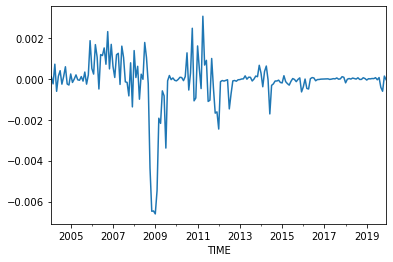

In [100]:
df_diff['EONIA_diff'].plot()

In [101]:
df_diff['EONIA_diff'].sort_values().head(10) # les 5 premières valeurs sont les valeurs extrêmes ( de la rupture )

TIME
2009-01   -0.006600
2008-11   -0.006471
2008-12   -0.006456
2009-02   -0.005467
2008-10   -0.004359
2009-07   -0.003386
2012-01   -0.002458
2009-04   -0.002180
2009-03   -0.001929
2014-06   -0.001719
Freq: M, Name: EONIA_diff, dtype: float64

In [102]:
# pour remplacer les valeurs de la rupture , on prendra comme valeur de départ ( 2008-10), la moyenne entre la valeur de 
# 2009-04 et celle de 2009-03 et après , on prendra la moyenne entre cette dernière valeur 2009-04 et la nouvelle moyenne et 
# ainsi de suite  

In [103]:
df_diff['EONIA_diff']['2008-10']=(df_diff['EONIA_diff']['2009-04']+df_diff['EONIA_diff']['2009-03'])/2
df_diff['EONIA_diff']['2008-11']=(df_diff['EONIA_diff']['2008-10']+df_diff['EONIA_diff']['2009-04'])/2
df_diff['EONIA_diff']['2008-12']=(df_diff['EONIA_diff']['2008-10']+df_diff['EONIA_diff']['2008-11'])/2
df_diff['EONIA_diff']['2009-01']=(df_diff['EONIA_diff']['2008-11']+df_diff['EONIA_diff']['2008-12'])/2
df_diff['EONIA_diff']['2009-02']=(df_diff['EONIA_diff']['2009-01']+df_diff['EONIA_diff']['2008-12'])/2

<AxesSubplot:xlabel='TIME'>

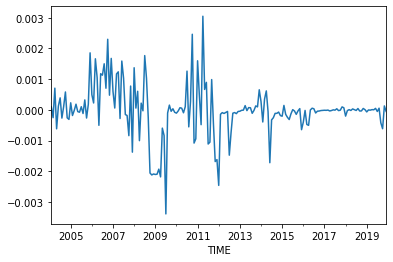

In [105]:
df_diff['EONIA_diff'].plot()    # rupture lissée

### <u><font color="DarkBlue">Sélection du modèle VAR </font></u>

In [106]:
model=VAR(df_diff)
results=model.select_order(maxlags=10)
results.summary()

,AIC,BIC,FPE,HQIC
0,-39.22,-39.15,9.288e-18,-39.19
1,-39.54,-39.19*,6.730e-18,-39.40*
2,-39.62,-38.98,6.213e-18,-39.36
3,-39.68,-38.76,5.882e-18,-39.30
4,-39.84,-38.63,5.016e-18,-39.35
5,-39.87,-38.38,4.878e-18,-39.26
6,-39.99*,-38.23,4.304e-18*,-39.28
7,-39.95,-37.90,4.536e-18,-39.11
8,-39.93,-37.60,4.625e-18,-38.99
9,-39.91,-37.30,4.745e-18,-38.85


In [107]:
# l'ordre choisi : 6 retards

In [108]:
#exporter le résultat
pd.DataFrame(results.summary()).to_csv("Order selection.txt",index=False,header=False)

In [109]:
var=model.fit(maxlags=10,ic='aic')  # estimer un VAR classique

### <u><font color="DarkBlue">Causalité de Granger </font></u>

In [1]:
# on a 4x4 = 16 paires de variables pour lesquelles on testerait la causalité de Granger
def causality_matrix(df):   
    ''' retourne une matrice contenant les p-values du test de causalité de Granger pour chaque paire de variables 
    '''
    matrix= pd.DataFrame(np.zeros((len(df.columns), len(df.columns))), columns=df.columns, index=df.columns)
    for c in matrix.columns:
        for r in matrix.index:
            résultat = grangercausalitytests(df[[r, c]], maxlag=[6], verbose=False)
            p_value = round(résultat[6][0]['ssr_ftest'][1],4)
            matrix.loc[r, c] = p_value
    matrix.columns = [var + '_x' for var in df.columns]
    matrix.index = [var + '_y' for var in df.columns]
    return matrix

In [111]:
causality_matrix(df_diff)

,EONIA_diff_x,IP_energy_diff_x,IPCenergyexcluded_diff_x,Euro_Stoxx_diff_x
EONIA_diff_y,1.0000,0.0172,0.8760,0.0005
IP_energy_diff_y,0.8351,1.0000,0.3873,0.0098
IPCenergyexcluded_diff_y,0.5237,0.2791,1.0000,0.2815
Euro_Stoxx_diff_y,0.7048,0.4689,0.0778,1.0000


In [112]:
# quand p-value < 5% --> la variable en colonne cause au sens de Granger la variable en ligne

In [ ]:
# exporter le résultat :
causality_matrix(df_diff).to_csv('causalité de Granger.txt')

### <u><font color="DarkBlue">Estimation d'un VECM</font></u>

In [113]:
rank_test = select_coint_rank(df, det_order=-1,  k_ar_diff=6, signif=0.05)
rank_test.rank

2

In [114]:
model_vecm = VECM(df_diff, exog=None, coint_rank=2, k_ar_diff=6, deterministic='nc')
res_vecm = model_vecm.fit()
res_vecm.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.EONIA_diff,-0.6888,0.071,-9.706,0.000,-0.828,-0.550
L1.IP_energy_diff,-0.0114,0.007,-1.551,0.121,-0.026,0.003
L1.IPCenergyexcluded_diff,0.0230,0.023,1.024,0.306,-0.021,0.067
L1.Euro_Stoxx_diff,-0.0097,0.003,-3.370,0.001,-0.015,-0.004
L2.EONIA_diff,-0.6657,0.085,-7.807,0.000,-0.833,-0.499
L2.IP_energy_diff,-0.0002,0.007,-0.028,0.978,-0.014,0.013
L2.IPCenergyexcluded_diff,0.0144,0.021,0.670,0.503,-0.028,0.056
L2.Euro_Stoxx_diff,-0.0078,0.003,-2.936,0.003,-0.013,-0.003
L3.EONIA_diff,-0.4130,0.096,-4.315,0.000,-0.601,-0.225
L3.IP_energy_diff,0.0014,0.006,0.230,0.818,-0.011,0.014


In [ ]:
# exporter le résultat
# Il s'agit d'un output de plusieurs tables (10 ) et qui ne sont pas des dataframes , donc on doit looper et les convertir en 
# dataframes
for i in range(0,10):
    pd.DataFrame(res_vecm.summary().tables[i]).to_csv("résultat vecm"+str(i)+".txt",index=False,header=False)

### <u><font color="DarkBlue">Fonctions de réponse</font></u>

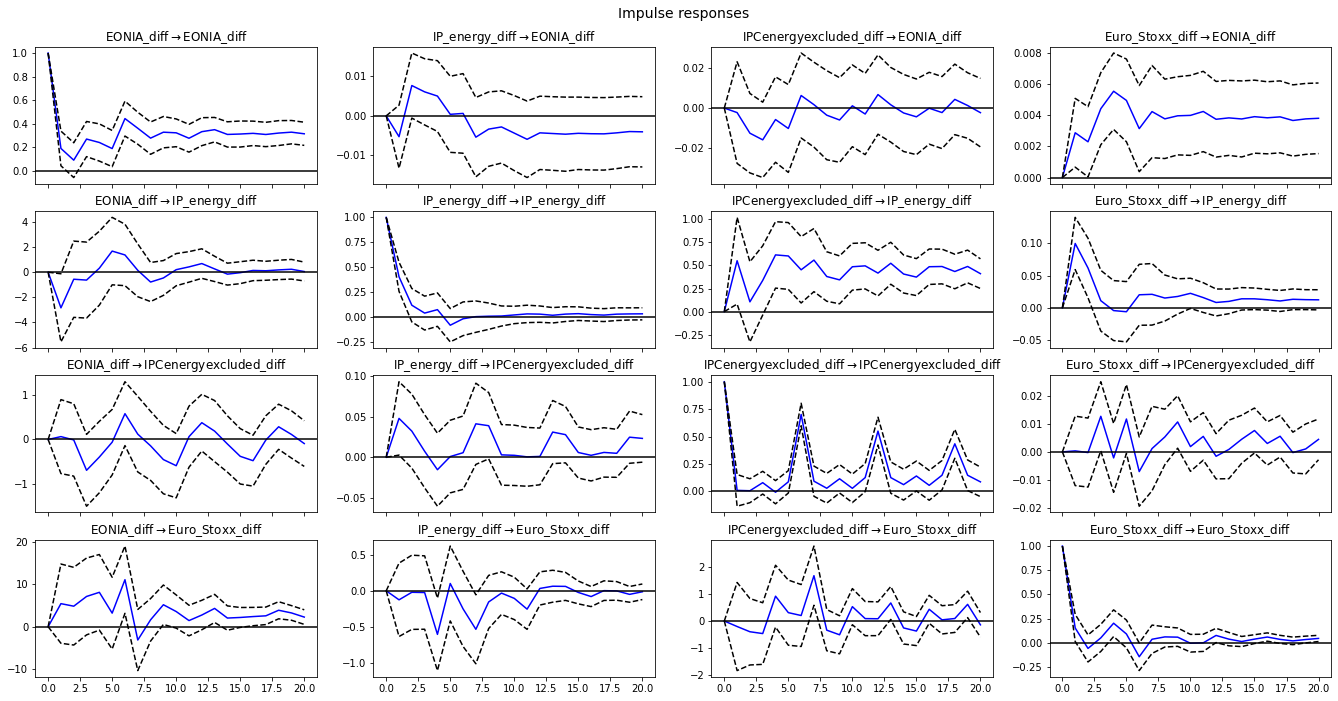

In [115]:
num_periods = 20
ir = res_vecm.irf(periods=num_periods)
ir.plot(figsize=(20, 10))
fig1 = plt.gcf()       # enregistrer la figure pour pouvoir l'exporter après , sinon on aura une image vide ( stackoverflow )
plt.show()

In [116]:
# exporter le plot
fig1.savefig("IRF4.png",dpi=300)

### <u><font color="DarkBlue">Décomposition de la variance des erreurs de prévision</font></u>

<Figure size 864x432 with 0 Axes>

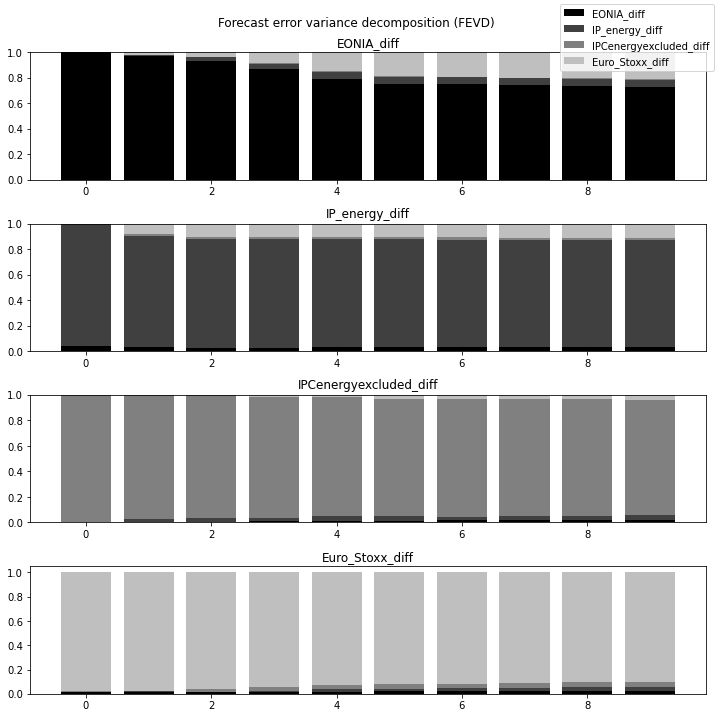

In [117]:
plt.figure(figsize=(12,6))
fig=var.fevd(10).plot()
fig.tight_layout()
fig2 = plt.gcf()        # pour pouvoir l'exporter après , sinon on aura une image vide ( stackoverflow )
plt.show() 

In [118]:
# Nous n'avons pas trouvé de paramètres pour la position de la légende ni pour les couleurs pour pouvoir améliorer un peu plus
# le graphe 

In [119]:
# exporter le plot
fig2.savefig("FEVD.png",dpi=300)